In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import sqlite3
#The basic packages are imported

# Setup of Medical Codes, Records Acquisition and Data Wrangling/Cleaning

In [2]:
import setup as s
import records as r
import clean as c
import clean2 as c2

In [3]:
c.denominator
#this is the dataframe containing all patients with benign polyps

,index,encounter_key,claim_type_code,icd_type,discharge_status_code,admit_type_code,DA,D1,D2,D3,...,P11,P12,P13,P14,P15,patient_id,total_claim_charge_amount,bill_type_code,doctor_id,hospital_id
125,125,b2ff5e25ef396d1b37da4bd7f7bc4ed7bf63242f6807de...,I,9,,,562.1,562.1,211.3,,...,,,,,,dce553a9508c25e439171274397adf3be0c31182c5d4bf...,000000740000,831,924f908412a2243aefaaf1a1abbe0651e668e6340c3993...,be265ef876f368e9285623d4202c2db129aaf401c5449f...
435,435,ecff758b15a1a6e93c09f6d3adc7033b27ba48f824d045...,I,9,01,3,54.39,54.39,211.3,,...,,,,,,f157360c6b7894973d598204e725a5887b27b0072f2d13...,000001844476,111,880251f5ae409dc658535736b41eadc8456f569f7f9828...,09b2a1add271711f7cda18eedb9a9a6315f4a103e605cf...
564,564,19b516dd184c38e369d34fc774286bcc702b16759753f3...,I,9,,,57.81,57.81,211.3,45.5,...,,,,,,4544ac27e14e02f16689c6ae2dab0a004b1610617e4b11...,000000236033,131,95558115a97a04dea62cc868bc5a4f7868c59771eb8376...,1c0a6598efb9ee9c9e2a875b5a8d327f161b6df34c20b9...
618,618,4c231bb6dc7e12b6b54af0ca6d421b3203d2cf4f61f923...,I,9,01,1,56.93,532.4,28.51,59.9,...,,,,,,f9f5840f724cd2b0007f49b5d8a10eec5b25da82f5d605...,000003316075,117,9de9d46a7b57ce0ad6c4d6e26780c8b4a49252c0957409...,9d15ec3cbf06399569956ed421d80c58086363cb464427...
636,636,3fb27b882f9ba1da80b2b8fe68c436ceb572c5d69abc5e...,I,9,,,562.1,562.1,79.34,211.3,...,,,,,,09ba0c67ea0d3e24fc368cf371f022c2cb18f2a3caa48b...,000000432100,131,f4fe9d68e9a06488e63ab414c44bbb6f7c37ecb6a3320c...,b4730e5b559347e2db23c0086492d99dc1cef0d0b16120...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118263,1118263,de39034d7a17235de542ab549b5f1aa2b3db0505ed1f92...,I,9,,,,,211.3,,...,,,,,,8939cea0353423f3944fcdc7965edc21d375121d0203d1...,000000283473,131,be8d2e2ae39bba6bcec948c54d9383cd9a3039240937cd...,7a3bc2608928271a8da6a13a71a4795ad82d6beb6d8a88...
1118269,1118269,665aa9a9d4be01f9dc6c57ee9cc0e5f6bc9eb401a56028...,I,9,,,,,211.3,562.1,...,,,,,,324e5d34f30838e80b7b5228407c0df0ed0eefcc59c047...,000000160400,131,24739e2a4fc43001a4c76135d355bd19c5376e5fe4b85f...,8eab8689e47aa829b7997ceb5cda1706c5e87ca839f0be...
1118270,1118270,16ef4aa1d8977210d796016a884140123d3d99cdaeb774...,I,9,,,57.7,,211.3,79.34,...,,,,,,f3144d967da5fa01361c980be569883c64eced651f5ca5...,000001248407,131,d496e9fa876ee8bd7a9643076b22b538291501d8d20797...,e77d8913236ab3af0130c354f083a3cc5770b0d74c807e...
1118275,1118275,2fd4d00fb05302011b41c806ab8275cef5d98af94fcbb3...,I,9,,,,,211.3,,...,,,,,,a28a44bed4cfb599e8a5368f1d28fe3f1d686b156d62cb...,000000199500,831,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,2de62dc2b8dfae006f9d85380d2308c02bdb1c01a6ba4e...


In [4]:
c2.numerator
#This is the dataframe containing the records of patients upon whom surgeries that should not have been done

,index,encounter_key,claim_type_code,icd_type,discharge_status_code,admit_type_code,DA,D1,D2,D3,...,P11,P12,P13,P14,P15,patient_id,total_claim_charge_amount,bill_type_code,doctor_id,hospital_id
1349,1349,c1f7f8643a656b095f05e58e2f1b84f18dfe9c85814c85...,I,9,01,1,55.89,56.09,211.3,530.19,...,,,,,,6049f1f9786d6568eaa9306b4e87c6bae7e1ebc55f69d9...,000003202993,111,9a96f55a48834babe711879d83f19da8f33a52feab1d17...,b8291a0d34baf7c9b19fa1a2de1253767917cf5062acb8...
1564,1564,ff76a6e996efddf9329c2ddbbecfaf1daafe1a2d15f47c...,I,9,06,1,62.38,18.2,567.89,428.23,...,54.91,54.91,99.21,,,b8364f1db9b6284a334230e173f341846bbaeab82a597f...,000024872940,111,52fb389c54450bdde7f98a4f2fc18eba091b4239b8298a...,de20e4849f01090deddd429c3421746044f216ddebacca...
2261,2261,daa393a4c2371d387935b21cde7f35bc6d439244383ce3...,I,9,01,1,56.09,560.81,211.4,23.81,...,,,,,,5ecd2590b6bd32daaa10848b61508f110e40b2bcb75a15...,000001070622,111,0eae61729f50bba978c8baa40525e934c969cdb282d486...,04a7c88c47085c82c4bcd73468fef0ef8debcb9a570826...
2489,2489,7e3f5bad5122ee2fdfe87c83a02212dce2c20ed680d455...,I,9,01,1,57.89,57.89,304,535.5,...,,,,,,02eeaa00ab562d420603b24cc853efe054af4a11f92137...,000001597700,111,0ebe57b8eef724cd312ed986dbc3b97e92cbf7ec19d168...,9aa1a6d10e740d702be48b6f422a95d134183301895599...
2629,2629,07a911c2d2458b3348a4c3c9067623ffda6e2e5f8c9964...,I,9,01,1,57.89,57.89,28.51,211.3,...,,,,,,82f16eeed359373a616f78d171dd09f199dee00f0a902f...,000003642625,111,684957743cfd65fcf1866b8995064acad1eefe204b0ab9...,faa6e34b8db4efa7123acb87f028cd562787a2fd818ea5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118004,1118004,59f505b03002d461c1de1de018c604d1332dd7ef714ee2...,I,9,,,,,211.3,569.49,...,,,,,,319fa68ea7f98133e917bda429511c9e2c3cb37feec821...,000000133169,131,3bc78a165fdaab565cdfa2d1f8b9d9e1815e56c83f65f2...,8b9886192b044f29c176299022a05125e017f9b2fe72c3...
1118037,1118037,a5320a8ac3e27b65f8f40e0333e57de20ee09a16b4c613...,I,9,,,,,211.3,530.81,...,,,,,,b07aa509bbf0c8620bc23da673d48426b010cbc0ba05b0...,000000387884,131,8ff5139b54acf56c7ce19649a81967ddb535b30bfb2a6d...,863b3d51461e5485e4dca67e2fdb35d3ef68347a34212c...
1118178,1118178,37e518e8c0c7f668731b893a1ae13c781dd8f63323a989...,I,9,,,,,211.3,250,...,,,,,,48025140b75b427c94012302948844a22c05df270f50de...,000000143168,131,3ce76281ceb8ecd53df51be731283a502edc2f866972f8...,02f3017f445fe62b934438080c6a51393263ec7a091701...
1118263,1118263,de39034d7a17235de542ab549b5f1aa2b3db0505ed1f92...,I,9,,,,,211.3,,...,,,,,,8939cea0353423f3944fcdc7965edc21d375121d0203d1...,000000283473,131,be8d2e2ae39bba6bcec948c54d9383cd9a3039240937cd...,7a3bc2608928271a8da6a13a71a4795ad82d6beb6d8a88...


# Results

In [5]:
num=pd.DataFrame(c2.numerator.groupby(by=['doctor_id']).size())
den=pd.DataFrame(c.denominator.groupby(by=['doctor_id']).size())
#Both dataframes are grouped by the doctors and amount of patients they had.
Violations=den.join(num, lsuffix='Denominator', rsuffix='Numerator')
Violations=Violations.rename(columns={'0Denominator':'Denominator','0Numerator':'Numerator'})
Violations['Numerator']=Violations['Numerator'].fillna(0)
#Doctors with patients with benign polyps but no surgeries will have no violations. 
#Within the dataframe, this will show up as nan and therefore, the nans have to be filled as a 0.
Violations['Numerator']=Violations['Numerator'].astype(int)
Violations['Violation Rate']=round(100*(Violations['Numerator']/Violations['Denominator']),2)
Violations

,Denominator,Numerator,Violation Rate
doctor_id,,,
00011a3bdb96736407f60e498f001ac8075a4260bd805ca0e9740df52f5d3944,1,0,0.00
0039d4128cf7ae2e9a637ded9b0f056aecda20105c5b1fa176ac84dc1fdcb5af,1,1,100.00
0053f157450476af69c501f39e8780d7cea30aafbfb9a2f0e6b2a1ee54e1f0e5,8,1,12.50
006764cf23e7df5bf91511cf1c2c78903ee7c1683a936d4ba6e080fac7b7d681,1,1,100.00
0067c410b32482e2e46323b01a592300a87c9ae54b5ab400f0d173b15ab4ec56,1,0,0.00
...,...,...,...
fed826b68a18b292061647510e3af421f6363fa9775c0b0fabff49302f9d9e63,4,0,0.00
ff40d814b56fdfb00155cb8056067d677e321f33910f1eaf1a7f6c0cfb079abe,1,0,0.00
ff85ef17981328049edd106722c2571400595112b1713561cb41f20b1a7c06a7,1,0,0.00


# Analysis

According to the resource materials given, the cost of of endoscopic resection is \\$5,570 per patient on average while a surgical recision is \\$18,717 per patient. This means that the patient/insurer is paying \\$13,147 in extra costs for unnecessary procedures. This leads to the question as to how much money in theory has been paid as extra costs and how much money according to the records has been paid out.

In [6]:
Theoretical_costs=13417*len(c2.numerator)
'$'+str(Theoretical_costs)

'$21507451'

In [7]:
Cost_records=c2.numerator.total_claim_charge_amount.astype(float)/100
'$'+str(round(sum(Cost_records),2))

'$21794303.8'

Given the theoretical amount, the patients from these particular records have paid about \\$300,000 extra on top of unnecessary expenses. 

What about the distribution of patient costs?

<AxesSubplot:xlabel='total_claim_charge_amount'>

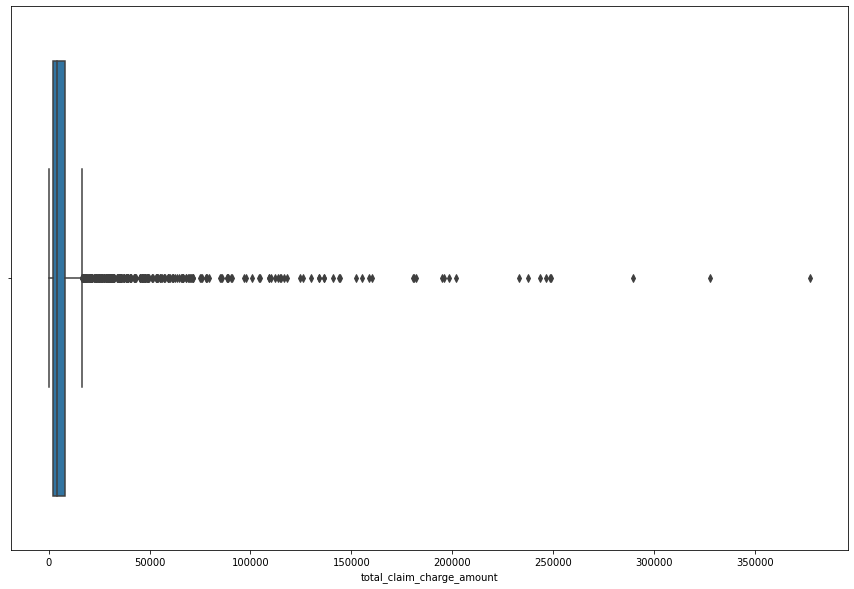

In [8]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x=Cost_records)

Nearly all of the records are under \\$100K. Most of the records are under \\$25K.

In [9]:
Cost_records_brackets=[]
for i in range(0,len(Cost_records)):
    if Cost_records.iloc[i]<1000.00:
        Cost_records_brackets.append('<$1000')
    if (Cost_records.iloc[i]>1000) & (Cost_records.iloc[i]<2500):
        Cost_records_brackets.append('$1000-$2500')
    if (Cost_records.iloc[i]>2500) & (Cost_records.iloc[i]<5000):
        Cost_records_brackets.append('$2500-$5000')
    if (Cost_records.iloc[i]>5000) & (Cost_records.iloc[i]<7500):
        Cost_records_brackets.append('$5000-$7500')
    if (Cost_records.iloc[i]>7500) & (Cost_records.iloc[i]<10000):
        Cost_records_brackets.append('$7500-$10000')
    if (Cost_records.iloc[i]>10000) & (Cost_records.iloc[i]<12500):
        Cost_records_brackets.append('$10000-$12500')
    if (Cost_records.iloc[i]>12500) & (Cost_records.iloc[i]<15000):
        Cost_records_brackets.append('$12500-$15000')
    if (Cost_records.iloc[i]>15000) & (Cost_records.iloc[i]<17500):
        Cost_records_brackets.append('$15000-$17500')
    if (Cost_records.iloc[i]>17500) & (Cost_records.iloc[i]<20000):
        Cost_records_brackets.append('$17500-$20000')
    if (Cost_records.iloc[i]>20000) & (Cost_records.iloc[i]<25000):
        Cost_records_brackets.append('$20000-$25000')

len(Cost_records_brackets)/len(Cost_records)

0.8590143480973176

About 86% of patients have costs that are under $25K. 

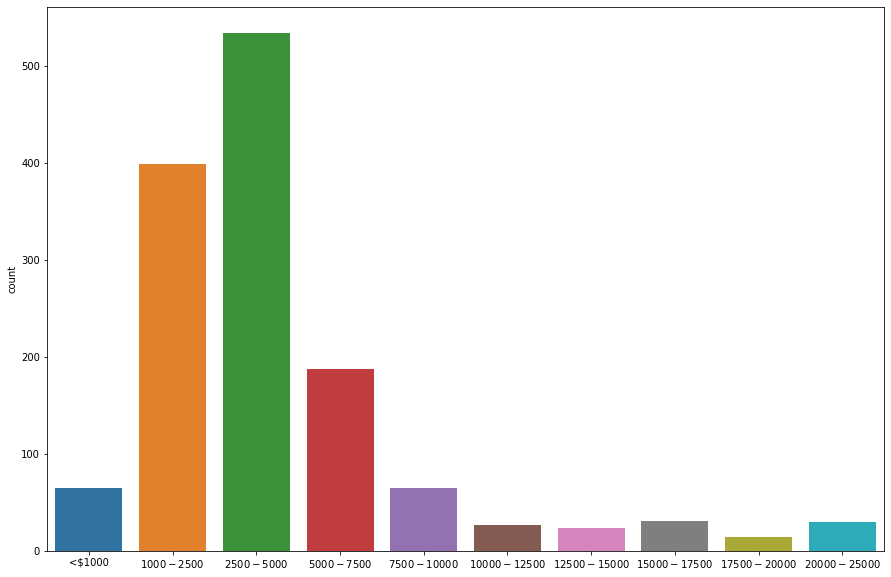

In [10]:
fig=plt.figure(figsize=(15,10))
sns.countplot(x=Cost_records_brackets, order=['<$1000','$1000-$2500','$2500-$5000','$5000-$7500',\
                                              '$7500-$10000','$10000-$12500','$12500-$15000',\
                                              '$15000-$17500','$17500-$20000','$20000-$25000'])
plt.show()

In terms of creating a ranking of doctor based on the violation rate, the fact that there are many doctors with one denominator patient and no violations along with one denominator patient and one violation missrepresent the data if a ordinal ranking was created. Therefore, I opted to output the doctors with a violation rate of less than 10%. 

In [11]:
Violations[Violations['Violation Rate']<10]
print('There are',len(Violations[Violations['Violation Rate']<10]),'doctors out of', \
len(den),'who have a violation rate of <10%')

There are 1032 doctors out of 1909 who have a violation rate of <10%


These are the doctors that should receive top ranking and to whom patients should be referred to by their primary care physicians. 

# Predicting Future Doctor Performance

For this section, I will select the doctor with the most denominator patients as too few data points will not work and utilize the records to test which ML algorithm works the best with this data. After that, I will apply the best ML model to the rest of the doctors that have a decent amount of records.

In [12]:
#imports for ML models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix

In [13]:
doc=Violations.sort_values(by=['Denominator'],ascending=False).iloc[0].name
#This is the doctor id for the doc with the most denominator patients

In [14]:
#data wrangling for ML models. Need to create a labels column.
X=c.denominator[c.denominator['doctor_id'].isin([doc])]
surgeries=list(c2.numerator.index)
X['label']=0
for i in range(0,len(surgeries)):
    for j in range(0,len(X)):
        if X['index'].iloc[j]==surgeries[i]:
            X['label'].iloc[j]=1
y=X['label']
X=X.drop(['label','doctor_id','encounter_key','hospital_id','patient_id','claim_type_code'],axis=1)
#dropping the labels column along with extraneous info
X=X.replace(r'^\s*$',0, regex=True)

<ipython-input-14-f538adbffc58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label']=0
C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

## Logistic Regression

In [15]:
lreg=LogisticRegression(random_state=5,n_jobs=-1)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=5)
lreg.fit(X_train,y_train)
pred_lreg=lreg.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,pred_lreg))
print("Precision score:",precision_score(y_test,pred_lreg))
print("Recall score:",recall_score(y_test,pred_lreg))
confusion_matrix(y_test,pred_lreg)

Accuracy score: 0.9514563106796117
Precision score: 0.5
Recall score: 0.2


array([[97,  1],
       [ 4,  1]], dtype=int64)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


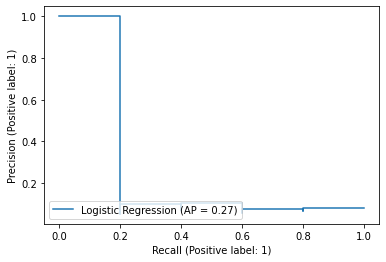

In [16]:
plot_precision_recall_curve(lreg, X_test,y_test,name='Logistic Regression')

## Decision Tree

In [17]:
Dtree=DecisionTreeClassifier(random_state=5)
Dtree.fit(X_train,y_train)
pred_Dtree=Dtree.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,pred_Dtree))
print("Precision score:",precision_score(y_test,pred_Dtree))
print("Recall score:",recall_score(y_test,pred_Dtree))
confusion_matrix(y_test,pred_Dtree)

Accuracy score: 0.8737864077669902
Precision score: 0.16666666666666666
Recall score: 0.4


array([[88, 10],
       [ 3,  2]], dtype=int64)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


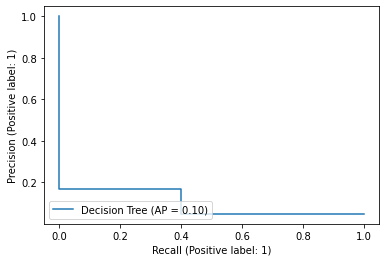

In [18]:
plot_precision_recall_curve(Dtree, X_test,y_test,name='Decision Tree')

## Support Vector Machine(SVM) 

In [19]:
SVM=svm.SVC(random_state=5)
SVM.fit(X_train,y_train)
pred_SVM=SVM.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,pred_SVM))
print("Precision score:",precision_score(y_test,pred_SVM))
print("Recall score:",recall_score(y_test,pred_SVM))
confusion_matrix(y_test,pred_SVM)

Accuracy score: 0.9514563106796117
Precision score: 0.0
Recall score: 0.0


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[98,  0],
       [ 5,  0]], dtype=int64)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


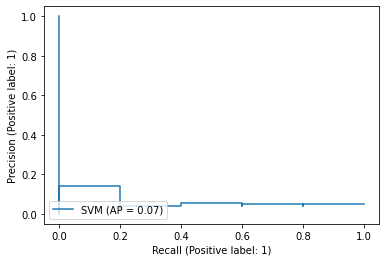

In [20]:
plot_precision_recall_curve(SVM, X_test,y_test,name='SVM')

## K Nearest Neighbor

In [21]:
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)
pred_KNN=KNN.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,pred_KNN))
print("Precision score:",precision_score(y_test,pred_KNN))
print("Recall score:",recall_score(y_test,pred_KNN))
confusion_matrix(y_test,pred_KNN)

Accuracy score: 0.9514563106796117
Precision score: 0.0
Recall score: 0.0


C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[98,  0],
       [ 5,  0]], dtype=int64)

C:\Users\Nasibul\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


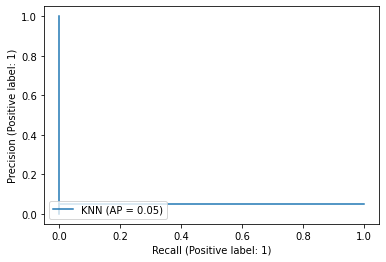

In [22]:
plot_precision_recall_curve(KNN, X_test,y_test,name='KNN')

I chose these four ML algorithms because they excel at binary classification. Logistic Regression, SVM and KNN got the same exact score while the Decision Tree did not. This makes sense as the Decision Tree picks a feature and creates a threshold value to classify samples. In hindsight, if the data had more continuous values, it might have been more effective. The other three simply did not have enough data to increase their accuracy. However, the average precision tells a different story. Logistic Regression has a 4-5 times higher average precision than SVM and KNN. 0.27 still isn't great but much better than 0.05 and 0.07. On top of this, the data is very imbalanced in terms of the binary classes. There were only 27 violations out of 409 patients for this doctor. After examining the individual precision and recall scores however, KNN and SVM both have zero precision and recall. Even though Decision Tree has a bit less accuracy than Logistic Regression, Decision Tree actually has a higher recall. Considering the confusion matrices, KNN and SVM also did not pick up on any true negatives as well.    